In [354]:
# Import third party libraries

# Numerical library
import numpy as np

# Used for matrix inversion
from numpy.linalg import inv

# Plotting library
import matplotlib.pyplot as plt
from matplotlib import gridspec

import collections

# Allows for printing inline for jupyter notebook
%matplotlib inline 

In [22]:
# Load datasets and store in ndarray
training_data = open('C:\Users\whitlock\Downloads\housing_train.txt','r')
X_train = np.loadtxt(training_data)

testing_data = open('C:\Users\whitlock\Downloads\housing_test.txt', 'r')
X_test = np.loadtxt(testing_data)

In [23]:
# Split off known target values
y_train = X_train[:,13]
y_test = X_test[:,13]

# Add dimension to y_train and transpose
y_train = y_train[np.newaxis].T
y_test = y_test[np.newaxis].T

In [24]:
# Remove column 13 from X
X_train = np.delete(X_train, 13, axis=1)
X_test = np.delete(X_test, 13, axis=1)

# Function to create array of dummy ones and returned 
# columnar vector
def make_dummy_vector(target):
    temp = np.ones(len(target))
    return temp[np.newaxis].T

# Create dummy 1 values
dummy_train = make_dummy_vector(X_train)
dummy_test = make_dummy_vector(X_test)

# Add dummy data to feature matrices
X_train = np.concatenate((dummy_train, X_train), axis=1)
X_test = np.concatenate((dummy_test, X_test), axis=1)

## WE SHOULD TALK ABOUT THIS AS A GROUP
# Transpose X for further calculations
#X_train = X_train.T
#X_test = X_test.T

print X_train.shape

(433L, 14L)


In [26]:
## PART 2
# Compute optimal weight vector w = (X^T * X)^-1 (X^T * Y)
def calc_w_vector(X, y):
    return np.dot(inv(np.dot(X.T,X)), np.dot(X.T,y))

def alt_calc(X,y):
    return np.dot(np.dot(inv(X), inv(X.T), np.dot(X.T,y)))
    
# Limit printout to 3 decimal places
np.set_printoptions(precision=3)

# Caculate w vectors
w_train = calc_w_vector(X_train,y_train)
w_test = calc_w_vector(X_test,y_test)

# Print both weight vectors to console
print 'w_train vector:'
print('\n'.join('{}: {}'.format(*k) for k in enumerate(w_train)))

print ' \r\nw_test vector:'
print('\n'.join('{}: {}'.format(*k) for k in enumerate(w_test)))

w_train vector:
0: [ 39.584]
1: [-0.101]
2: [ 0.046]
3: [-0.003]
4: [ 3.072]
5: [-17.225]
6: [ 3.711]
7: [ 0.007]
8: [-1.599]
9: [ 0.374]
10: [-0.016]
11: [-1.024]
12: [ 0.01]
13: [-0.586]
 
w_test vector:
0: [ 16.494]
1: [-0.03]
2: [ 0.01]
3: [-0.16]
4: [ 1.129]
5: [-6.583]
6: [ 4.438]
7: [-0.077]
8: [-0.845]
9: [-0.025]
10: [ 0.005]
11: [-0.7]
12: [ 0.01]
13: [-0.037]


In [100]:
## PART 3
# Functions
def calc_sse(X, y, w):
    return np.dot(np.subtract(y, np.dot(X, w)).T, np.subtract(y,np.dot(X, w)))

# Apply learned weight vectors
target_func_train = np.dot(X_train, w_train)
target_func_test = np.dot(X_test, w_test)

# Print error output, not sure about the 0 values

print 'Training Model: \r\nSSE: %.2f \r\n' % calc_sse(X_train, y_train, w_train)

print 'Testing Model: \r\nSSE: %.2f' % calc_sse(X_test, y_test, w_test)

Training Model: 
SSE: 9561.19 

Testing Model: 
SSE: 852.51


In [29]:
## PART 4
# Repeating part 2 and 3 without a dummy features of 1's in X

# Remove dummy column from both tables
X_train_no_dummy = X_train[:, (1,2,3,4,5,6,7,8,9,10,11,12,13)]
X_test_no_dummy = X_test[:, (1,2,3,4,5,6,7,8,9,10,11,12,13)]

# Caculate w vectors
w_train_no_dummy = calc_w_vector(X_train_no_dummy,y_train)
w_test_no_dummy = calc_w_vector(X_test_no_dummy,y_test)

# Print both weight vectors to console
print 'w_train_no_dummy vector:'
print('\n'.join('{}: {}'.format(*k) for k in enumerate(w_train_no_dummy)))

print ' \r\nw_test_no_dummy vector:'
print('\n'.join('{}: {}'.format(*k) for k in enumerate(w_test_no_dummy)))

w_train_no_dummy vector:
0: [-0.098]
1: [ 0.049]
2: [-0.025]
3: [ 3.451]
4: [-0.355]
5: [ 5.817]
6: [-0.003]
7: [-1.021]
8: [ 0.227]
9: [-0.012]
10: [-0.388]
11: [ 0.017]
12: [-0.485]
 
w_test_no_dummy vector:
0: [ 0.011]
1: [ 0.01]
2: [-0.19]
3: [ 1.126]
4: [-1.137]
5: [ 5.801]
6: [-0.081]
7: [-0.649]
8: [-0.129]
9: [ 0.008]
10: [-0.572]
11: [ 0.011]
12: [ 0.072]


<h3>Thoughts about results</h3>
The above results make it seems like our model will be centered around the orgin beacuse we did not calcuate a true b value in the w vector.

In [30]:
## PART 4 cont.
# Apply learned weight vectors
target_func_train_no_dummy = np.dot(X_train_no_dummy, w_train_no_dummy)
target_func_test_no_dummy = np.dot(X_test_no_dummy, w_test_no_dummy)

# Print error output, not sure about the 0 values
print 'Training Model without Dummy: \r\nSSE: %.2f \r\n' % calc_sse(X_train_no_dummy, y_train, w_train_no_dummy)

print 'Testing Model without dummy: \r\nSSE: %.2f' % calc_sse(X_test_no_dummy, y_test, w_test_no_dummy)

Training Model without Dummy: 
SSE: 10598.06 

Testing Model without dummy: 
SSE: 883.85


In [366]:
def generate_uniform_feat(low,high,length):
    return np.random.uniform(low,high,length)[np.newaxis].T

# Set up values and experiment names
a_vals = [10,100,200,400,600,800,1000,1200,1400,1600]
experiments = np.arange(10)
inst = ["train", "test"]


new_features = {}

# Loop through and create feature for train and test
ctr = 0
for exp in experiments:
    for item in inst:
        if item == 'train':
            new_features["f_{0}_{1}".format(item,exp)] = generate_uniform_feat(0, a_vals[ctr], 433)
        else:
            new_features["f_{0}_{1}".format(item,exp)] = generate_uniform_feat(0, a_vals[ctr], 74)
    ctr += 1

#for key, value in new_features.iteritems() :
#    print key, value


In [367]:
## PART 5
# Set up cases for 2,4,6,8,10 additional uniformly distributed features
def concatenate_features(tuple_obj, is_col):
    return np.concatenate((tuple_obj), axis=is_col)

def build_tuple(exp, item, ctr): 
    template = 'f_'
    return tuple(args)

def slicedict(d, s):
    return {k:v for k,v in d.iteritems() if k.endswith(s)}

new_datasets = [2,4,6,8,10]


# Need to add factor for dynamic addition of features
ctr = 2
#for exp in experiments:
#    for item in inst:
#        if item == 'train':
#            new_features["f_{0}_{1}_bulit".format(item,exp)] = np.concatenate(build_tuple(exp,item,ctr), axis=1)
#        else:
#            new_features["f_{0}_{1}".format(item,exp)] = np.concatenate(build_tuple(ctr), axis=1)
#        ctr += 2

# New test matricies
two_feat_train = np.concatenate((X_train,new_features['f_train_0'],new_features['f_train_1']), axis=1)
two_feat_test = np.concatenate((X_test,new_features['f_test_0'],new_features['f_test_1']), axis=1)

four_feat_train = np.concatenate((two_feat_train,new_features['f_train_2'],new_features['f_train_3']), axis=1)
four_feat_test = np.concatenate((two_feat_test, new_features['f_test_2'],new_features['f_test_3']), axis=1)

six_feat_train = np.concatenate((four_feat_train, new_features['f_train_4'],new_features['f_train_5']), axis=1)
six_feat_test = np.concatenate((four_feat_test, new_features['f_test_4'],new_features['f_test_5']), axis=1)

eight_feat_train = np.concatenate((six_feat_train, new_features['f_train_6'],new_features['f_train_7']), axis=1)
eight_feat_test = np.concatenate((six_feat_test, new_features['f_test_6'],new_features['f_test_7']), axis=1)

ten_feat_train = np.concatenate((eight_feat_train,new_features['f_train_8'],new_features['f_train_9']), axis=1)
ten_feat_test = np.concatenate((eight_feat_test,new_features['f_test_8'],new_features['f_test_9']), axis=1)

In [368]:
# Create weight vector for each test case
w_two_train = calc_w_vector(two_feat_train, y_train)
w_two_test = calc_w_vector(two_feat_test, y_test)

w_four_train = calc_w_vector(four_feat_train, y_train)
w_four_test = calc_w_vector(four_feat_test, y_test)

w_six_train = calc_w_vector(six_feat_train, y_train)
w_six_test = calc_w_vector(six_feat_test, y_test)

w_eight_train = calc_w_vector(eight_feat_train, y_train)
w_eight_test = calc_w_vector(eight_feat_test, y_test)

w_ten_train = calc_w_vector(ten_feat_train, y_train)
w_ten_test = calc_w_vector(ten_feat_test, y_test)

np.set_printoptions(suppress=True)

In [369]:
# Store SSE scores in lists
sse_train = []
sse_test = []

sse_train.append(calc_sse(two_feat_train, y_train,w_two_train))
sse_test.append(calc_sse(two_feat_test, y_test,w_two_test))

sse_train.append(calc_sse(four_feat_train, y_train,w_four_train))
sse_test.append(calc_sse(four_feat_test, y_test,w_four_test))

sse_train.append(calc_sse(six_feat_train, y_train,w_six_train))
sse_test.append(calc_sse(six_feat_test, y_test,w_six_test))

sse_train.append(calc_sse(eight_feat_train, y_train,w_eight_train))
sse_test.append(calc_sse(eight_feat_test, y_test,w_eight_test))

sse_train.append(calc_sse(ten_feat_train, y_train,w_ten_train))
sse_test.append(calc_sse(ten_feat_test, y_test,w_ten_test))

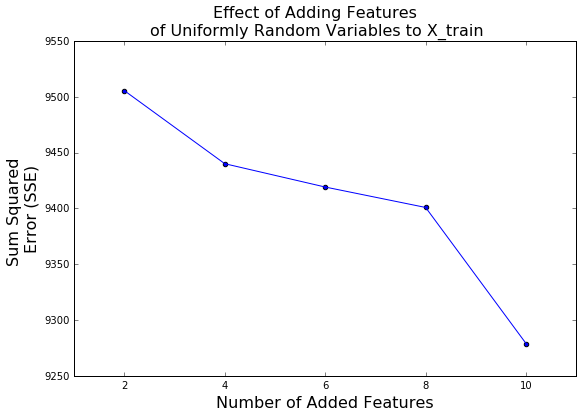

In [370]:
# Plot the values gathered above
fig = plt.figure(figsize=(9,6))
plt.scatter(new_datasets,sse_train)
plt.plot(np.resize(new_datasets,(len(new_datasets),1)),np.resize(sse_train,(len(sse_train),1)))
fig.suptitle('Effect of Adding Features \nof Uniformly Random Variables to X_train', fontsize=16)
plt.xlabel('Number of Added Features', fontsize=16)
plt.ylabel('Sum Squared \nError (SSE)', fontsize=16)

# Save plot
fig.savefig('Part_5_Train.png')

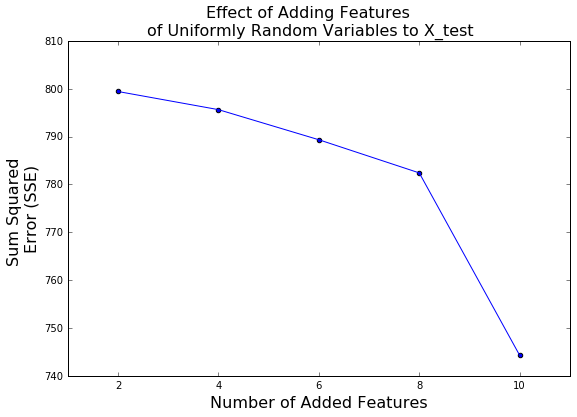

In [371]:
# Plot of effect of alterficial features on X_test
fig = plt.figure(figsize=(9,6))
plt.scatter(new_datasets,sse_test)
plt.plot(np.resize(new_datasets,(len(new_datasets),1)),np.resize(sse_test,(len(sse_test),1)))
fig.suptitle('Effect of Adding Features \nof Uniformly Random Variables to X_test', fontsize=16)
plt.xlabel('Number of Added Features', fontsize=16)
plt.ylabel('Sum Squared \nError (SSE)', fontsize=16)

# Save plot
fig.savefig('Part_5_Testn.png')

In [77]:
# Calculate SSE for each feature experiment
print 'Two_train features added: \r\nSSE: %.2f \r\n' % calc_sse(two_feat_train, y_train,w_two_train)
print 'Four_train features added: \r\nSSE: %.2f \r\n' % calc_sse(four_feat_train, y_train,w_four_train)
print 'Six_train features added: \r\nSSE: %.2f \r\n' % calc_sse(six_feat_train, y_train,w_six_train)
print 'Eight_train features added: \r\nSSE: %.2f \r\n' % calc_sse(eight_feat_train, y_train,w_eight_train)
print 'Ten_train features added: \r\nSSE: %.2f \r\n' % calc_sse(ten_feat_train, y_train,w_ten_train)

print 'Two_test features added: \r\nSSE: %.2f \r\n' % calc_sse(two_feat_test, y_test,w_two_test)
print 'Four_test features added: \r\nSSE: %.2f \r\n' % calc_sse(four_feat_test, y_test,w_four_test)
print 'Six_test features added: \r\nSSE: %.2f \r\n' % calc_sse(six_feat_test, y_test,w_six_test)
print 'Eight_test features added: \r\nSSE: %.2f \r\n' % calc_sse(eight_feat_test, y_test,w_eight_test)
print 'Ten_test features added: \r\nSSE: %.2f \r\n' % calc_sse(ten_feat_test, y_test,w_ten_test)

Two_train features added: 
SSE: 9449.58 

Four_train features added: 
SSE: 9420.73 

Six_train features added: 
SSE: 9412.14 

Eight_train features added: 
SSE: 9401.46 

Ten_train features added: 
SSE: 9261.35 

Two_test features added: 
SSE: 846.37 

Four_test features added: 
SSE: 836.00 

Six_test features added: 
SSE: 782.54 

Eight_test features added: 
SSE: 762.84 

Ten_test features added: 
SSE: 718.56 



In [255]:

# Compute optimal weight vector w -- (X^T * X + lamda * I)^-1 (X^T * Y)
def calc_w_vector_identity(X, y, lamda):
    I = np.identity(len(np.dot(X.T,X)))
    return np.dot(inv(np.dot(X.T,X) + lamda * I), np.dot(X.T,y))
    
# Limit printout to 3 decimal places
np.set_printoptions(precision=3)
w_train_results, w_test_results = {}, {}
# lamdas = [value * 0.01 for value in range(5, 5001, 5)]
# lamdas.insert(0, 0.01)
lamdas = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 30, 40, 50, 100, 200, 300]

# Caculate w vectors
for lamda in lamdas:
    w_train_results.setdefault(lamda, [])
    w_train = calc_w_vector_identity(X_train,y_train, lamda)
    w_train_results[lamda] = np.asarray(w_train)
    
    w_test_results.setdefault(lamda, [])
    w_test = calc_w_vector_identity(X_test,y_test, lamda)
    w_test_results[lamda] = w_test

sse_train, sse_test = {}, {}
# Print error output, not sure about the 0 values
print 'Training Model:'
for key in w_train_results:
    w_train = w_train_results[key]
    target_func_train = np.dot(X_train, w_train)
    sse = calc_sse(X_train, y_train, w_train)
    sse_train.setdefault(key, sse[0][0])
    print '[%0.2f]-SSE: %.2f \r\n' % (key, sse)

print 'Testing Model:'
for key in w_test_results:
    w_test = w_test_results[key]
    target_func_test = np.dot(X_test, w_test)
    sse = calc_sse(X_test, y_test, w_test)
    sse_test.setdefault(key, sse[0][0])
    print '[%0.2f]-SSE: %.2f \r\n' % (key, sse)

Training Model:
[0.50]-SSE: 9790.23 

[1.00]-SSE: 9977.30 

[100.00]-SSE: 11407.59 

[5.00]-SSE: 10381.24 

[0.10]-SSE: 9585.75 

[40.00]-SSE: 10795.47 

[10.00]-SSE: 10495.34 

[300.00]-SSE: 13435.20 

[0.05]-SSE: 9568.44 

[200.00]-SSE: 12482.54 

[50.00]-SSE: 10890.30 

[20.00]-SSE: 10610.29 

[30.00]-SSE: 10703.37 

[0.01]-SSE: 9561.53 

Testing Model:
[0.50]-SSE: 873.74 

[1.00]-SSE: 878.50 

[100.00]-SSE: 1526.53 

[5.00]-SSE: 900.44 

[0.10]-SSE: 860.10 

[40.00]-SSE: 1205.19 

[10.00]-SSE: 939.23 

[300.00]-SSE: 1894.70 

[0.05]-SSE: 855.89 

[200.00]-SSE: 1769.14 

[50.00]-SSE: 1277.19 

[20.00]-SSE: 1032.06 

[30.00]-SSE: 1123.23 

[0.01]-SSE: 852.76 



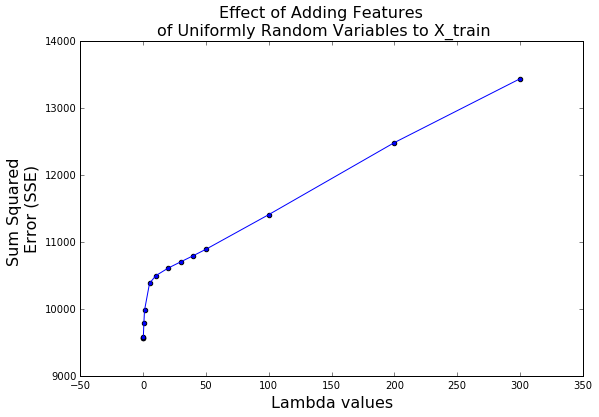

In [362]:
# Order dictionary
ordered_sse_train = collections.OrderedDict(sorted(sse_train.items()))

# Get values for plotting
lambda_train = ordered_sse_train.keys()
sse_values_train = ordered_sse_train.values()
w_train_final = w_train_results.values()


# Format and plot figure
fig = plt.figure(figsize=(9,6))
fig.suptitle('Effect of Adding Features \nof Uniformly Random Variables to X_train', fontsize=16)
plt.xlabel('Lambda values', fontsize=16)
plt.ylabel('Sum Squared \nError (SSE)', fontsize=16)
plt.scatter(lambda_train, sse_values_train)
plt.plot(lambda_train,sse_values_train)

# Save plot
fig.savefig('Part_6_Train.png')

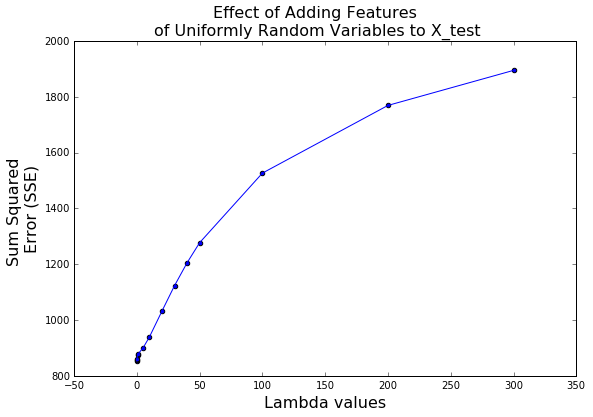

In [363]:
# Order dictionary
ordered_sse_test = collections.OrderedDict(sorted(sse_test.items()))

# Get values for plotting
lambda_test = ordered_sse_test.keys()
sse_values_test = ordered_sse_test.values()
w_test_final = w_test_results.values()

# Format and plot figure
fig = plt.figure(figsize=(9,6))
fig.suptitle('Effect of Adding Features \nof Uniformly Random Variables to X_test', fontsize=16)
plt.scatter(lambda_test, sse_values_test)
plt.plot(lambda_test,sse_values_test)
plt.xlabel('Lambda values', fontsize=16)
plt.ylabel('Sum Squared \nError (SSE)', fontsize=16)

# Save plot
fig.savefig('Part_6_Test.png')

In [240]:
print w_train_final[0]

[[ 21.321]
 [ -0.099]
 [  0.048]
 [ -0.024]
 [  3.162]
 [ -7.249]
 [  4.581]
 [  0.   ]
 [ -1.315]
 [  0.314]
 [ -0.015]
 [ -0.73 ]
 [  0.013]
 [ -0.55 ]]


In [269]:
print len(X_train_final)
print X_train_final
print len(y_train_final)
print y_train_final
print len(w_train_final)

print w_train_final[0].shape

print X_train.shape

18
[0.5, 1, 0.01, 100, 5, 0.1, 40, 10, 300, 0.05, 400, 200, 50, 20, 1000, 500, 30, 5000]
18
[9790.2251604016019, 9977.3011547401056, 9561.5263981480366, 11407.5855155106, 10381.239409733042, 9585.751811299122, 10795.467931283631, 10495.336218537594, 13435.198910842297, 9568.4444274575071, 14233.535092891085, 12482.538688592329, 10890.295252564614, 10610.294580496868, 17023.481884332854, 14899.199734156722, 10703.365572818517, 21478.392498442343]
14
(14L, 1L)
(433L, 14L)


In [272]:
## PART 8

# SEE with regularization term
def calc_sse_reg(X, y, w, lamda):
    return np.add(np.dot(np.subtract(y, np.dot(X, w)).T, np.subtract(y,np.dot(X, w))),np.dot(lamda,np.linalg.norm(w) ** 2))

## Not sure if we should be doing matrix addition above, or rather just adding the norm. THe above method seems to improve the SSE.
## Also I am not sure about the order of the norm

# Check result
ctr = 0
for i in lamdas:
    print 'New SSE: %.2f' % calc_sse_reg(X_train,y_train,w_train_final[ctr],i)
    ctr += 1


#print 'Initial SSE: %.2f' % calc_sse(X_train,y_train,w_train)
 # Verify effect of normalization
#print np.dot(0.01,np.linalg.norm(w_train)** 2)

# Regular addition
#print 'Regular addition: %.2f' % (calc_sse(X_train,y_train,w_train) + np.dot(0.50,np.linalg.norm(w_train)** 2))

New SSE: 9795.63
New SSE: 9991.01
New SSE: 11409.69
New SSE: 10412.03
New SSE: 10938.75
New SSE: 10947.11
New SSE: 10944.72
New SSE: 13629.86
New SSE: 57178.79
New SSE: 13027.23
New SSE: 12300.94
New SSE: 14285.99
New SSE: 17298.55
New SSE: 556547.14


In [302]:
# lamdas = [
#     0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
#     0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,
#     1,    2,    3,    4,    5,    6,    7,    8,    9,    10,
#     11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
#     21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   
#     31,   32,   33,   34,   35,   36,   37,   38,   39,   40,   
#     41,   42,   43,   44,   45,   46,   47,   48,   49,   50,   
#     51,   52,   53,   54,   55,   56,   57,   58,   59,   60,
#     61,   62,   63,   64,   65,   66,   67,   68,   69,   70,
#     71,   72,   73,   74,   75,   76,   77,   78,   79,   80,   
#     81,   82,   83,   84,   85,   86,   87,   88,   89,   90,   
#     91,   92,   93,   94,   95,   96,   97,   98,   99,   100
# ]

lamdas = np.arange(0,0.03,0.0001)

print len(lamdas)

# Prepare y values
regularized_sse = [[]]

ctr = 0
for i in range(14):
    for j in lamdas:
        regularized_sse.append(calc_sse_reg(X_train,y_train,w_train_final[[j],[i]]))
    

print len(regularized_sse)

#for i in range(15):
#    print regularized_sse[i]
    
# Plot the values gathered above
# fig = plt.figure(figsize=(9,6))
# plt.scatter(np.resize(lamdas,(len(lamdas),1)),np.resize(regularized_sse,(len(regularized_sse),1)))
# plt.plot(np.resize(lamdas,(len(lamdas),1)),np.resize(regularized_sse,(len(regularized_sse),1)))
# plt.axhline(y=calc_sse(X_train,y_train,w_train), color='red')
# fig.suptitle('Effect of Noramilzation Term', fontsize=16)
# plt.xlabel('Lamda Values', fontsize=16)
# plt.ylabel('Sum Squared \nError (SSE)', fontsize=16)

300


TypeError: list indices must be integers, not tuple

In [280]:
print calc_sse_reg(X_train,y_train,w_train_final[0],0.01)

[[ 9795.633]]


In [ ]:
print X_train.shape
print w_train.shape

In [ ]:
print X_train.T

In [ ]:
# Don't show scientific notation
np.set_printoptions(suppress=True)

print "Printing X_train:"
print X_train

In [ ]:
print "Printing y_train:"
print y_train

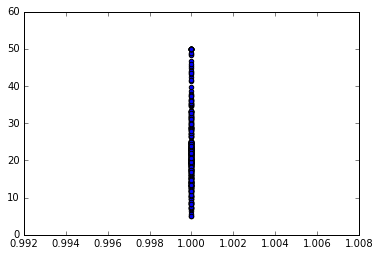

In [83]:
# Plot feature 1: Crime rate by town
plt.scatter(X_train[:, 0],y_train)

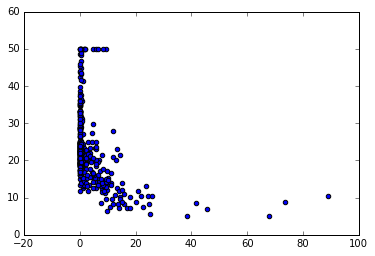

In [84]:
# Plot feature 2: Residential land zoned for lots over 25,0000 sq. ft
plt.scatter(X_train[:, 1],y_train)

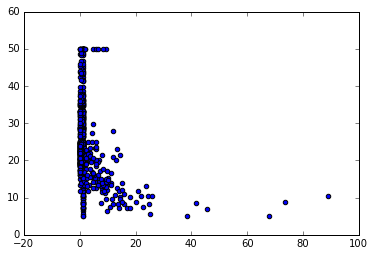

In [85]:
# Multiplotting feature 1 & 2
plt.scatter(X_train[:, 0],y_train)
plt.scatter(X_train[:, 1],y_train)

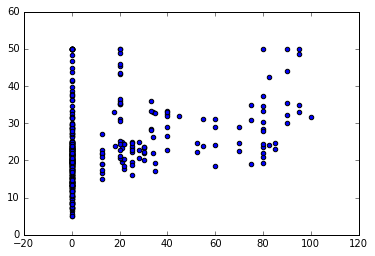

In [86]:
# Plot feature 3: Proportion of non-retail business acres per town
plt.scatter(X_train[:, 2],y_train)

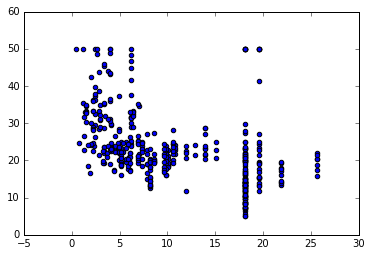

In [87]:
# Plot feature 4: Charles River dummy variable (= 1 if tract bounds river, 0 otherwise)
plt.scatter(X_train[:, 3],y_train)

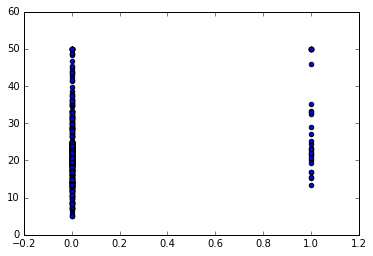

In [88]:
# Plot feature 5: Nitric oxides concentration (parts per 10 million)
plt.scatter(X_train[:, 4],y_train)

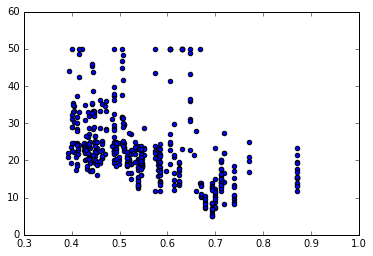

In [89]:
# Plot feature 6: Average number fo rooms per dwelling
plt.scatter(X_train[:, 5],y_train)

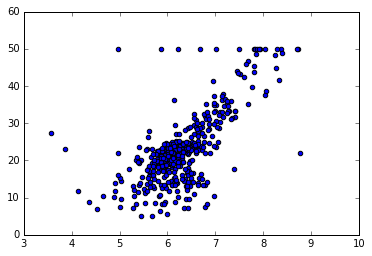

In [90]:
# Plot feature 7: Porportion of owner-occupied units built prior to 1940
plt.scatter(X_train[:, 6],y_train)

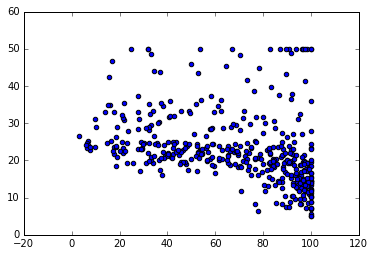

In [91]:
# Plot feature 8: Weighted distances to five Boston employment centers
plt.scatter(X_train[:, 7],y_train)

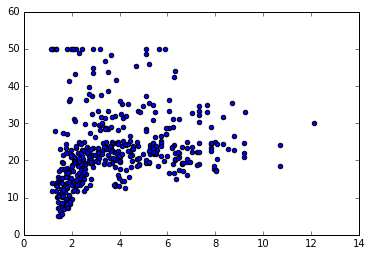

In [92]:
# Plot feature 9: Index of accessability to radial highways
plt.scatter(X_train[:, 8],y_train)

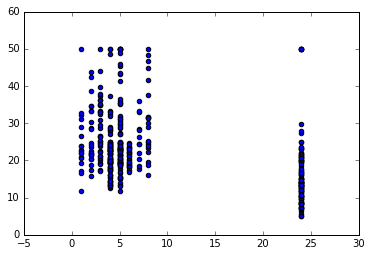

In [93]:
# Plot feature 10: Full-value property-tax rate per $10,000
plt.scatter(X_train[:, 9],y_train)

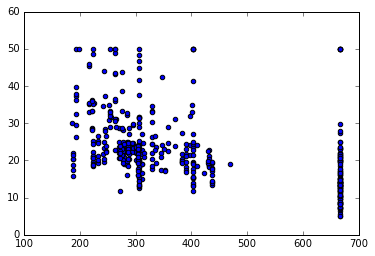

In [94]:
# Plot feature 11: Pupil-teacher ratio by town
plt.scatter(X_train[:, 10],y_train)

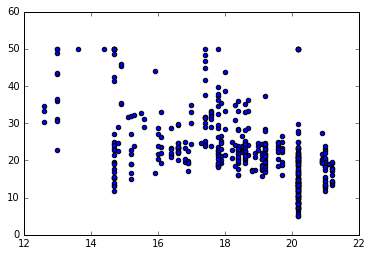

In [95]:
# Plot feature 12: 1000(Bk - 0.63)^2 where Bk is the population fo blacks by town
plt.scatter(X_train[:, 11],y_train)

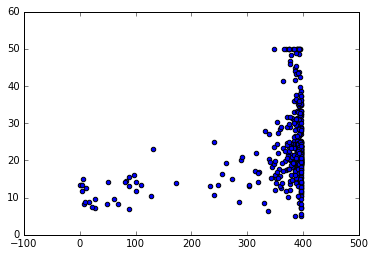

In [96]:
# Plot feature 13: % lower status of the population
plt.scatter(X_train[:, 12],y_train)